In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy as sp

In [16]:
def toGray(img):
    gray_vector=np.array([0.2989, 0.5870, 0.1140])
    img_gray=np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_gray[i][j]=img[i][j]@gray_vector
    return img_gray

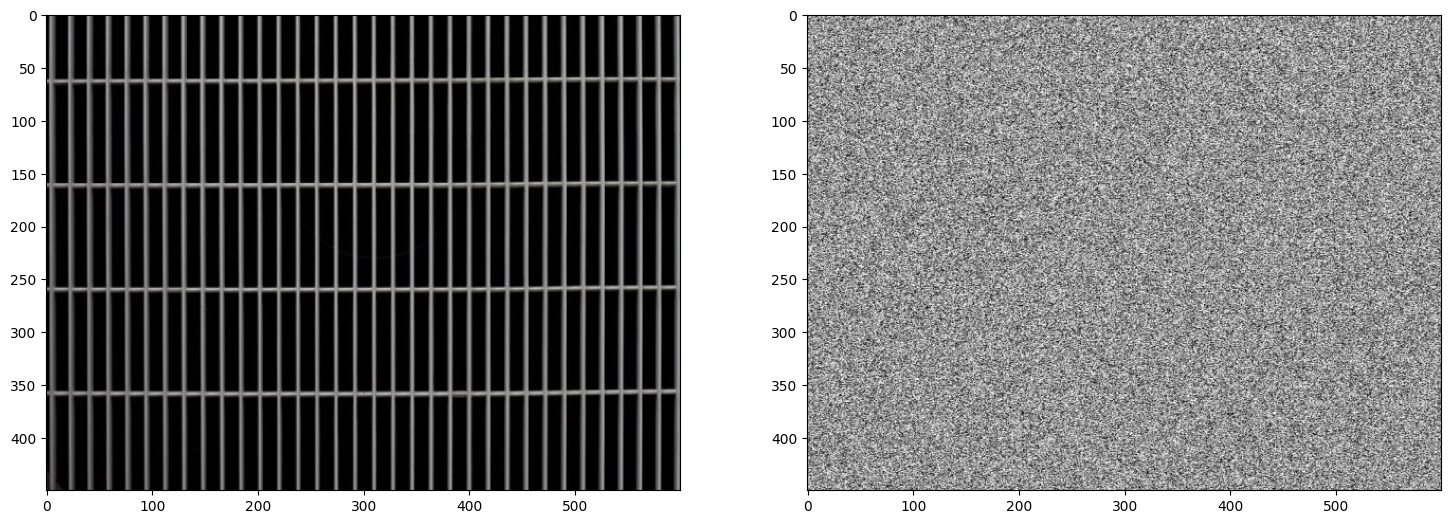

In [17]:
grating=plt.imread("grating.jpg")
whitenoise=plt.imread("whitenoise.jpg")
grating_gray=toGray(grating)
whitenoise_gray=toGray(whitenoise)
f,axs=plt.subplots(1,2,figsize=(18,15))
axs[0].imshow(grating)
axs[1].imshow(whitenoise)

In [18]:
def autoCovariance(img,x=0,y=0):
    rolled_img=np.roll(img,(x,y),axis=(0,1))
    rolled_img[:x,:]=0
    rolled_img[:,:y]=0
    autocov=np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            autocov[i][j]=img[i][j]*rolled_img[i][j]
    return autocov

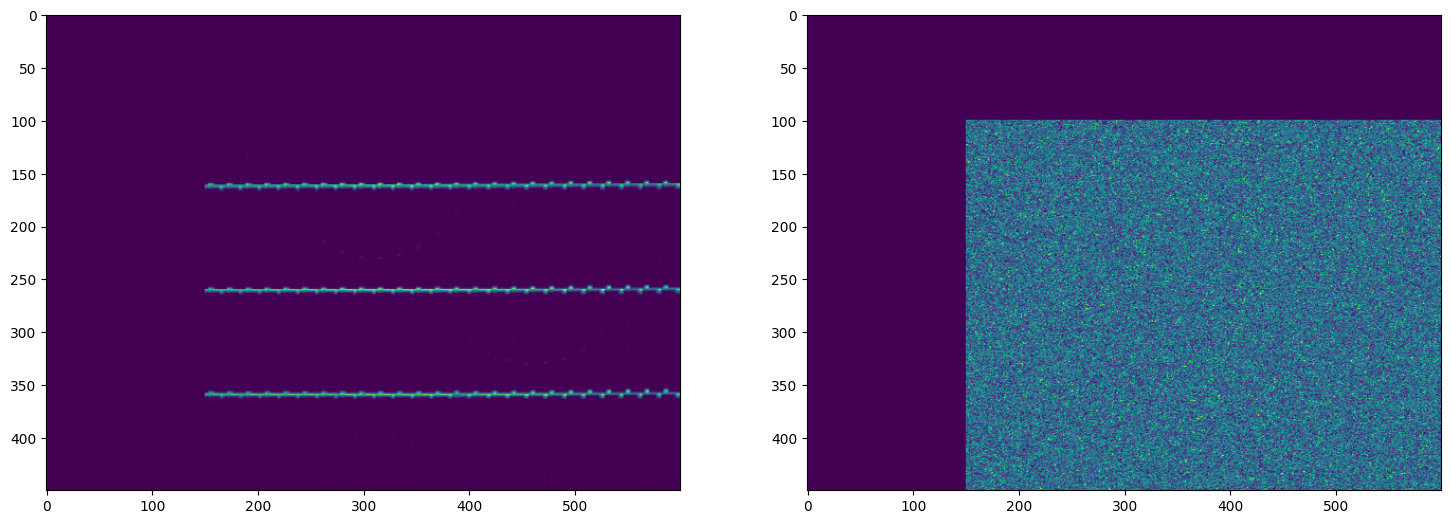

In [19]:
auto_grating=autoCovariance(grating_gray,100,150)
auto_whitenoise=autoCovariance(whitenoise_gray,100,150)
f,axs=plt.subplots(1,2,figsize=(18,15))
axs[0].imshow(auto_grating)
axs[1].imshow(auto_whitenoise)

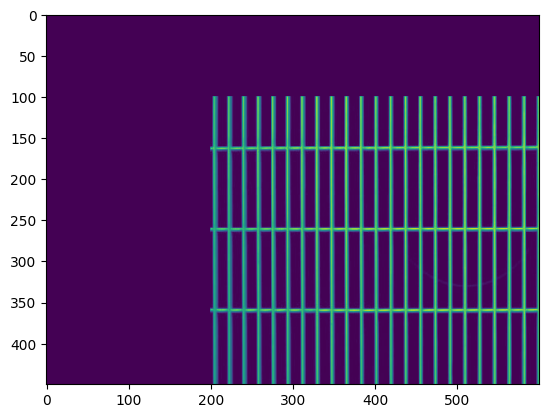

In [20]:
rolled=np.roll(grating_gray,(100,200),axis=(0,1))
rolled[:100,:]=0
rolled[:,:200]=0
plt.imshow(rolled)

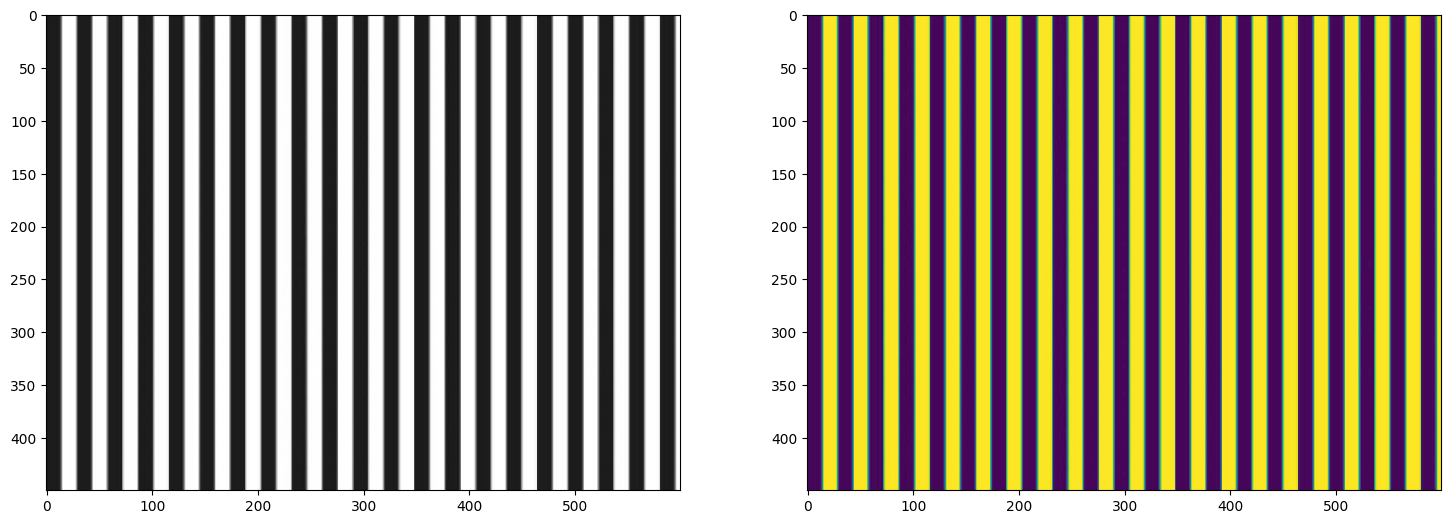

In [21]:
vertical_grating=plt.imread("vertical_grating.jpg")
vgrating_gray=toGray(vertical_grating)
f,axs=plt.subplots(1,2,figsize=(18,15))
axs[0].imshow(vertical_grating,"gray")
axs[1].imshow(vgrating_gray)

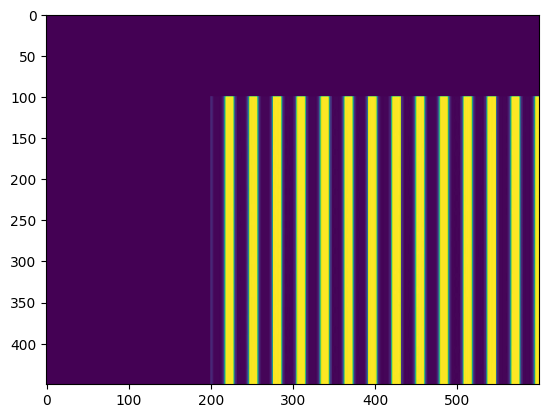

In [22]:
auto_vgrating=autoCovariance(vgrating_gray,100,200)
plt.imshow(auto_vgrating)

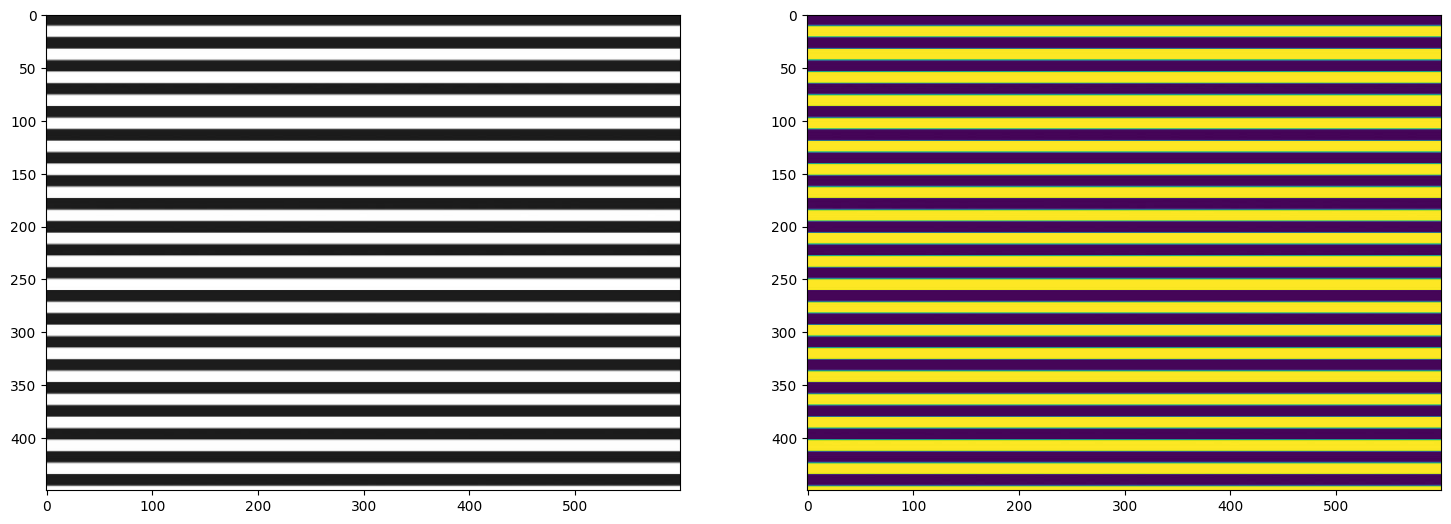

In [23]:
horizontal_grating=plt.imread("horizontal_grating.jpg")
hgrating_gray=toGray(horizontal_grating)
f,axs=plt.subplots(1,2,figsize=(18,15))
axs[0].imshow(horizontal_grating)
axs[1].imshow(hgrating_gray)

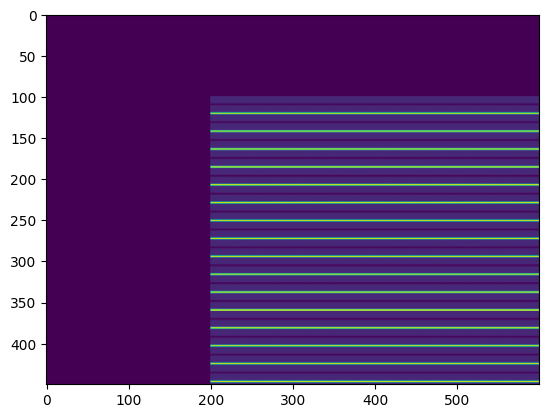

In [24]:
auto_hgrating=autoCovariance(hgrating_gray,100,200)
plt.imshow(auto_hgrating)

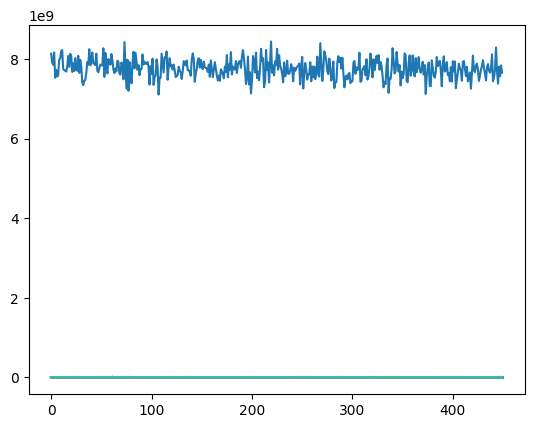

In [25]:
freqswn=sp.fft.fft(whitenoise_gray)
PSDwn=freqswn*np.conj(freqswn)
plt.plot(PSDwn)

Text(0.5, 1.0, 'Horizontal Grating')

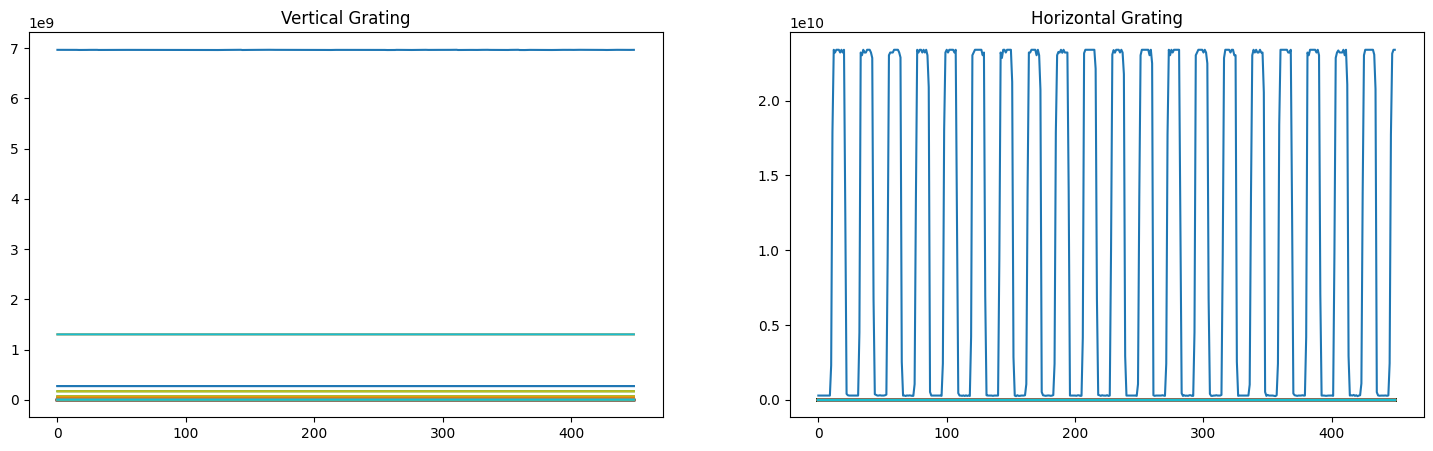

In [26]:
freqsvg=sp.fft.fft(vgrating_gray)
PSDvg=freqsvg*np.conj(freqsvg)
freqshg=sp.fft.fft(hgrating_gray)
PSDhg=freqshg*np.conj(freqshg)
f,axs=plt.subplots(1,2,figsize=(18,5))
axs[0].plot(PSDvg)
axs[0].set_title("Vertical Grating")
axs[1].plot(PSDhg)
axs[1].set_title("Horizontal Grating")

Text(0.5, 1.0, 'Horizontal Grating')

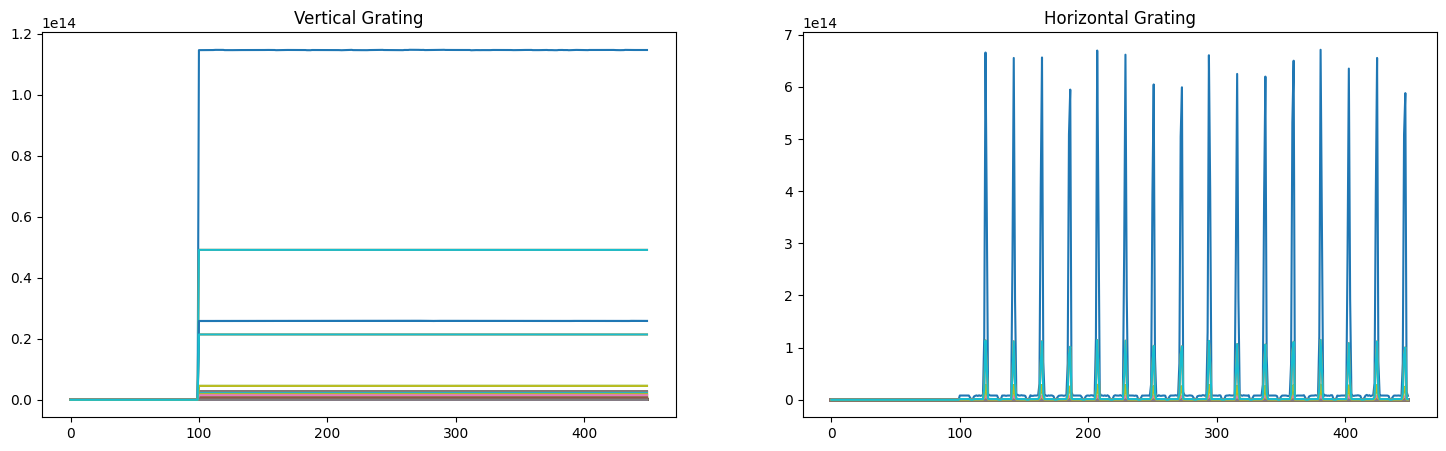

In [27]:
freqsvg=sp.fft.fft(auto_vgrating)
PSDvg=freqsvg*np.conj(freqsvg)
freqshg=sp.fft.fft(auto_hgrating)
PSDhg=freqshg*np.conj(freqshg)
f,axs=plt.subplots(1,2,figsize=(18,5))
axs[0].plot(PSDvg)
axs[0].set_title("Vertical Grating")
axs[1].plot(PSDhg)
axs[1].set_title("Horizontal Grating")